#### Import of Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [10]:
df = pd.read_csv('datasets/waterQuality/waterQuality.csv')
df = df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)


In [11]:
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [12]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB
Number of duplicated rows is:  0
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

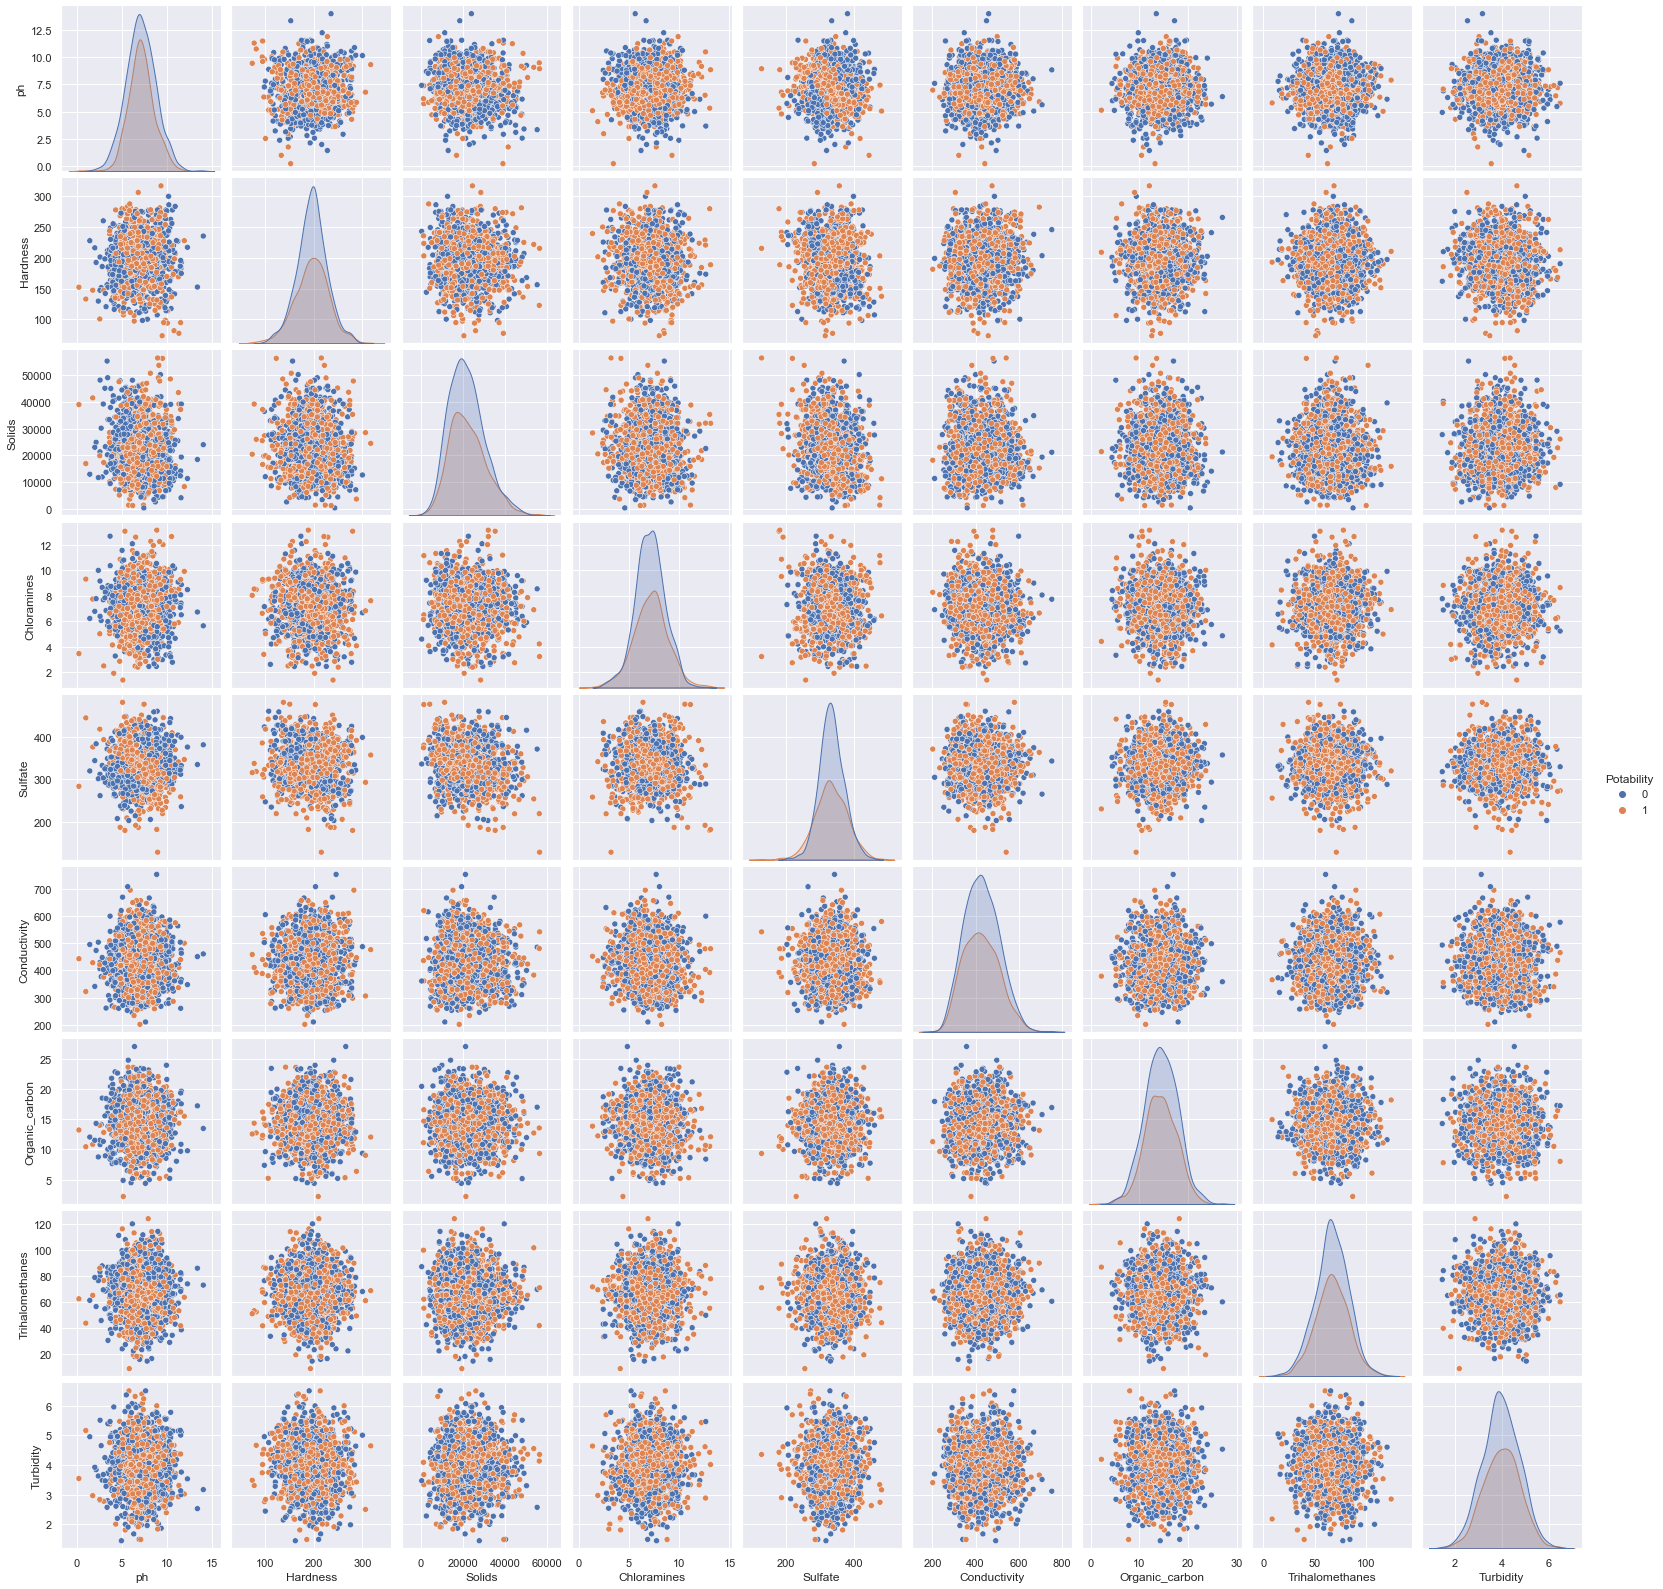

In [13]:
sns.pairplot(df, hue='Potability')
plt.show()

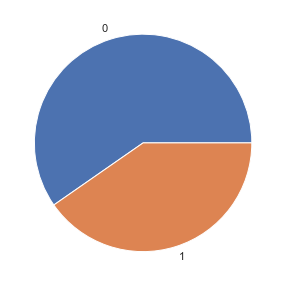

In [14]:
y =df['Potability']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [15]:
X = df.drop(columns=['Potability'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,7.085990,1.573337,0.227499,6.089723,7.027297,8.052969,14.000000
Hardness,2011.0,195.968072,32.635085,73.492234,176.744938,197.191839,216.441070,317.338124
Solids,2011.0,21917.441374,8642.239815,320.942611,15615.665390,20933.512750,27182.587067,56488.672413
Chloramines,2011.0,7.134338,1.584820,1.390871,6.138895,7.143907,8.109726,13.127000
Sulfate,2011.0,333.224672,41.205172,129.000000,307.632511,332.232177,359.330555,481.030642
Conductivity,2011.0,426.526409,80.712572,201.619737,366.680307,423.455906,482.373169,753.342620
Organic_carbon,2011.0,14.357709,3.324959,2.200000,12.124105,14.322019,16.683049,27.006707
Trihalomethanes,2011.0,66.400859,16.077109,8.577013,55.952664,66.542198,77.291925,124.000000
Turbidity,2011.0,3.969729,0.780346,1.450000,3.442915,3.968177,4.514175,6.494749


#### Standardize the Data

In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ph,2011.0,-2.119968e-16,1.000249,-4.360285,-0.633376,-0.037314,0.614757,4.395582
Hardness,2011.0,4.504933e-17,1.000249,-3.753822,-0.589179,0.037508,0.627487,3.719930
Solids,2011.0,6.978229e-17,1.000249,-2.499568,-0.729365,-0.113879,0.609385,4.001258
Chloramines,2011.0,-7.066561e-17,1.000249,-3.624952,-0.628267,0.006039,0.615610,3.782229
Sulfate,2011.0,1.943304e-16,1.000249,-4.957520,-0.621245,-0.024093,0.633716,3.587965
Conductivity,2011.0,7.720218e-16,1.000249,-2.787207,-0.741656,-0.038052,0.692094,4.050143
Organic_carbon,2011.0,4.169271e-16,1.000249,-3.657409,-0.671936,-0.010737,0.699533,3.805203
Trihalomethanes,2011.0,-7.278558e-16,1.000249,-3.597551,-0.650042,0.008793,0.677595,3.583571
Turbidity,2011.0,-3.427282e-16,1.000249,-3.229792,-0.675270,-0.001989,0.697872,3.236574


#### Observations and Variables

In [17]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

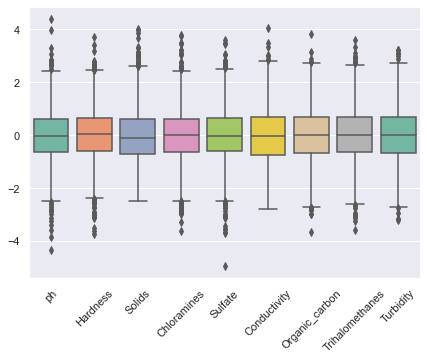

In [18]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

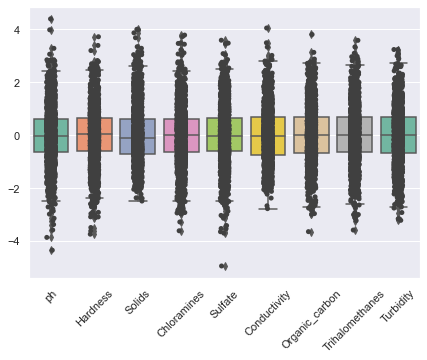

In [19]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

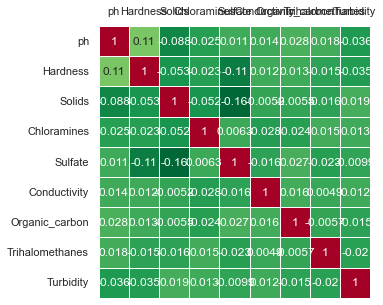

In [20]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [21]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [9] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [22]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.892775,-0.120349,-0.699173,-1.041457,-0.634642,-1.683917,-1.575579,-0.060240,-0.885899
1,-0.254284,-0.283669,0.306222,1.742431,0.947493,0.912515,-0.003907,1.290650,1.119344
2,1.052120,0.521765,-1.494034,-0.319245,2.348544,1.454426,0.762159,0.002524,-0.157759
3,-1.806796,-1.101505,-1.306046,-1.275221,1.672606,0.222297,-0.777888,0.860414,-2.138292
4,-0.487809,-1.111868,0.642654,0.654000,-0.638950,1.192423,-0.914109,-0.023684,1.088139
...,...,...,...,...,...,...,...,...,...
2006,-0.461479,-0.752429,-0.561259,1.550124,0.090784,1.026308,-1.003589,0.389498,0.520581
2007,-0.130748,-0.189528,0.149927,1.321942,2.198891,-0.569759,0.911437,-0.144283,0.962709
2008,1.337752,0.013148,0.375630,0.536474,0.042330,-1.184213,0.216151,4.736421,1.584403
2009,0.576312,0.641426,-0.326273,0.072135,0.397207,0.479178,0.604659,0.047402,-0.383446


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'9 Principal Components explain [100.0%] of the variance'}, xlabel='PC1 (13.4% expl.var)', ylabel='PC2 (13.0% expl.var)'>)

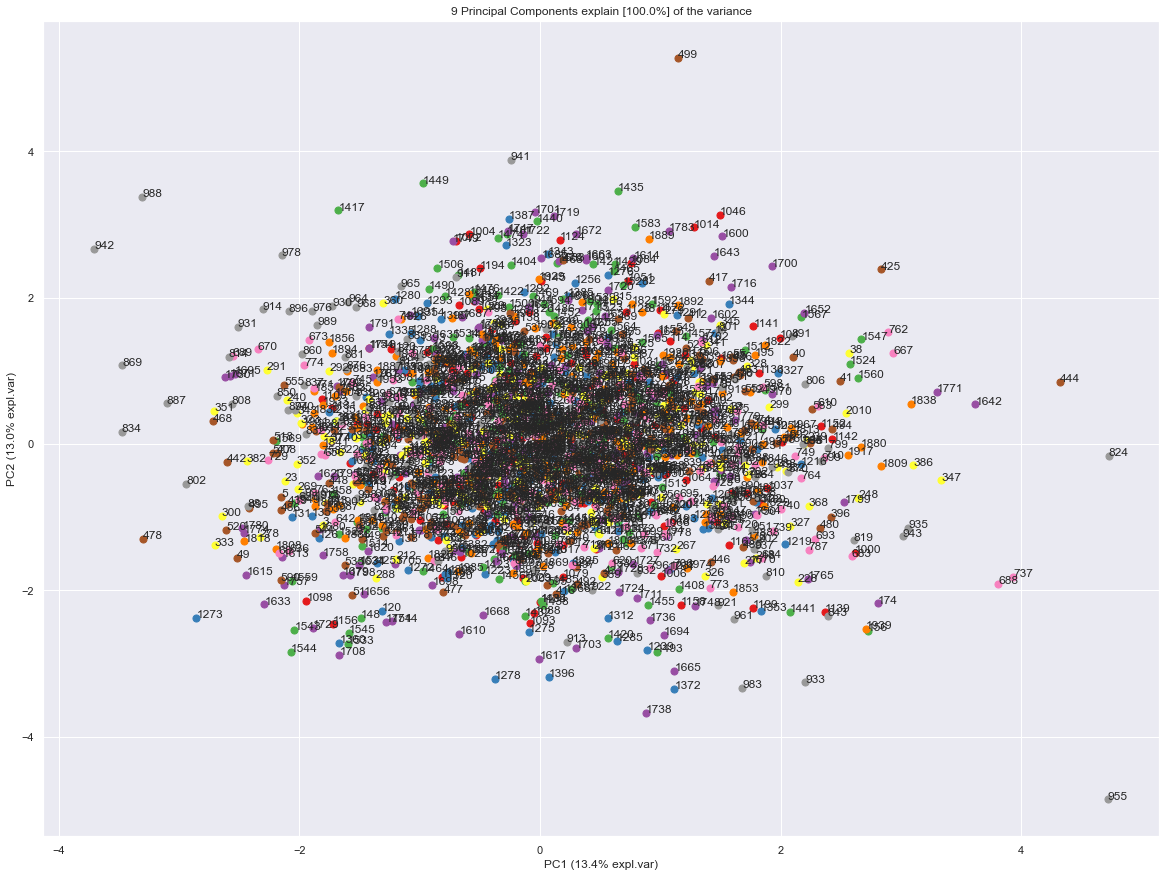

In [23]:
model.scatter(label=True, legend=False)

Eigenvectors

In [24]:
A = out['loadings'].T

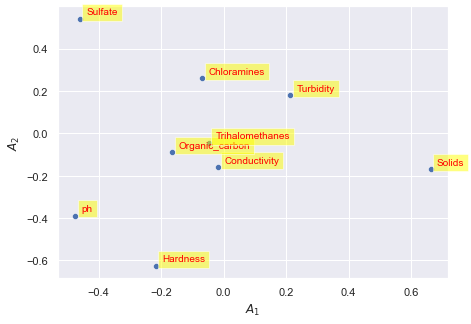

In [25]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

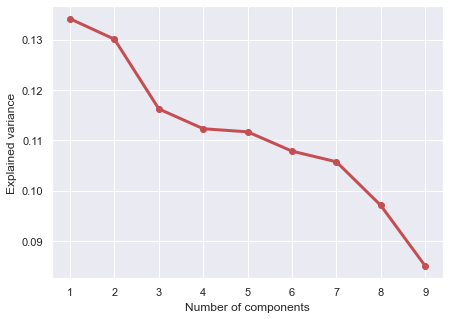

In [26]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

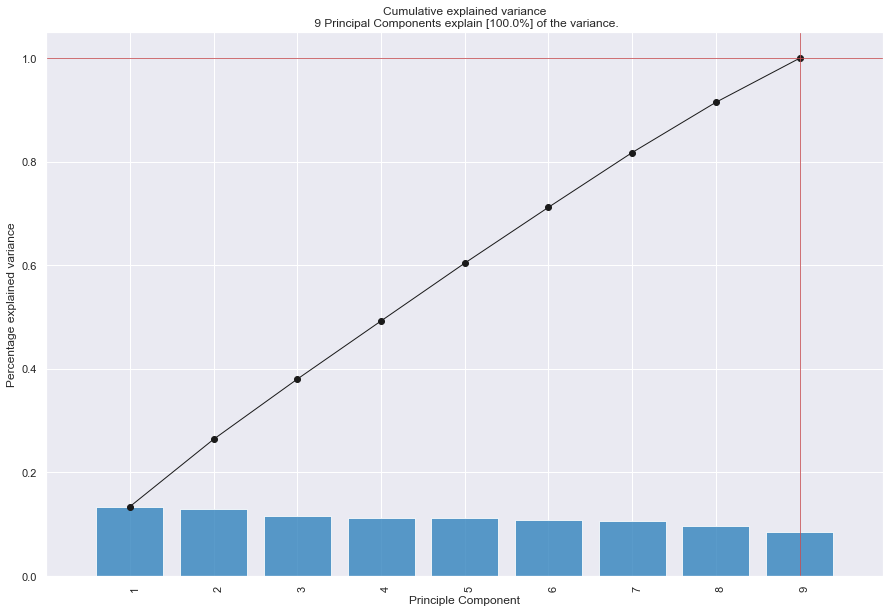

<Figure size 504x360 with 0 Axes>

In [27]:
model.plot();